In [43]:
import glob
from PIL import Image
import os
from IPython.display import display, clear_output

choice = 1

labelme_dir_path = '/workspace/adv_robustness/region_explainability/labelme'

dataset_dir_map = {
    0: 'MNIST_71',
    1: 'MNIST_94',
    2: 'MNIST_pullover_shirt',
    3: 'MNIST_sneaker_sandal'
    # 4: 'MNIST_sneaker_sandal_75',
}

dataset = dataset_dir_map[choice]

In [44]:
os.chdir(os.path.join(labelme_dir_path, dataset))
image_results_folders = glob.glob('results_*')

should_quit = False
skip_to_next_folder = False

for folder in image_results_folders:
    global should_quit
    os.chdir(os.path.join(labelme_dir_path, dataset, folder))
    images = glob.glob('*png')
    
    for image in images:
        img = Image.open(image)
        width, height = img.size
        left = 100
        top = height / 3
        right = 1300
        bottom = 2 * height / 3
        if width != 1200:
            img = img.crop((left, top, right, bottom))
            img.save(image)
        img.close()

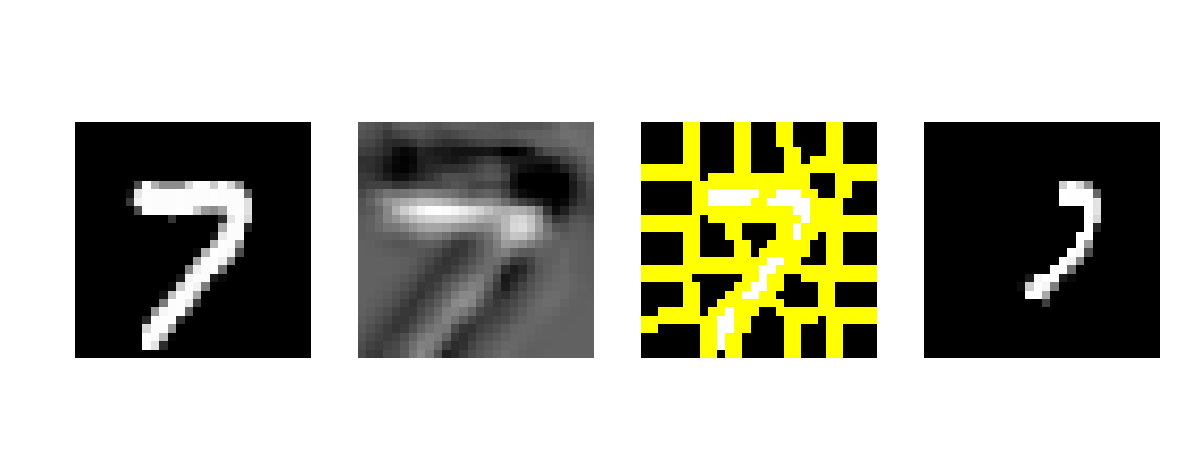

   image: seven_77.png
attr_seg: results_slic40_gradcam



enter (q) to quit, (n) to go next folder, or just press enter to continue q


In [45]:
os.chdir(os.path.join(labelme_dir_path, dataset))
image_results_folders = glob.glob('results_*')
print(image_results_folders)

should_quit = False
skip_to_next_folder = False

for folder in image_results_folders:
    global should_quit
    os.chdir(os.path.join(labelme_dir_path, dataset, folder))
    images = glob.glob('*png')
    
    for image in images:
        img = Image.open(image)
        width, height = img.size
        img.show()
        print('   image:', image)
        print('attr_seg:', folder)
        what_to_do = input('\nenter (q) to quit, (n) to go next folder, or just press enter to continue')
        if what_to_do == 'q':
            should_quit = True
            break
        elif what_to_do == 'n':
            skip_to_next_folder = True
            break
        img.close()
        clear_output(wait=True)
            
    if should_quit:
        break
    elif skip_to_next_folder:
        skip_to_next_folder = False
        continue